In [115]:
#Homework #5: Dimensionality Reduction
#Code was inspired by from Raschka: Ch 5 "Compressing Data via Dimensionality Reduction"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from yellowbrick.regressor import ResidualsPlot

In [15]:
data = pd.read_csv(r"C:\Users\jazoi\Downloads\hw5_treasury yield curve data.csv")
data.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [16]:
data.drop('Date', axis=1, inplace=True)
data.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [18]:
#Prints total nunmber of rows and columns in the dataset
#Confirmed correct by manual check of the dataset .csv file
#Recycled from my personal HW3 assignment
#Prints total nunmber of rows and columns in the dataset
#Confirmed correct by manual check of the dataset .csv file
#Recycled from my personal HW3 assignment

total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+ str(total_rows))
print("Number of Columns: "+ str(total_cols))
print()
data.shape

Number of Rows: 8635
Number of Columns: 31



(8635, 31)

In [216]:
#From the information above, some values are missing. To procede, all rows missing values must be dropped (8353 to 8071)
#Column should stay the same at 31
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 0 to 8070
Data columns (total 31 columns):
SVENF01      8071 non-null float64
SVENF02      8071 non-null float64
SVENF03      8071 non-null float64
SVENF04      8071 non-null float64
SVENF05      8071 non-null float64
SVENF06      8071 non-null float64
SVENF07      8071 non-null float64
SVENF08      8071 non-null float64
SVENF09      8071 non-null float64
SVENF10      8071 non-null float64
SVENF11      8071 non-null float64
SVENF12      8071 non-null float64
SVENF13      8071 non-null float64
SVENF14      8071 non-null float64
SVENF15      8071 non-null float64
SVENF16      8071 non-null float64
SVENF17      8071 non-null float64
SVENF18      8071 non-null float64
SVENF19      8071 non-null float64
SVENF20      8071 non-null float64
SVENF21      8071 non-null float64
SVENF22      8071 non-null float64
SVENF23      8071 non-null float64
SVENF24      8071 non-null float64
SVENF25      8071 non-null float64
SVENF26      8071 

In [217]:
#PART ONE: Exploratory Data Analysis (Use random_state = 42 and 85% of data for the training set)

data.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


In [25]:
corMat = pd.DataFrame(data[['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'SVENF06', 'Adj_Close']].corr())
corMat

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,Adj_Close
SVENF01,1.000000,0.986417,0.958364,0.924637,0.890691,0.860385,-0.849562
SVENF02,0.986417,1.000000,0.991325,0.971026,0.945906,0.920994,-0.884194
SVENF03,0.958364,0.991325,1.000000,0.993681,0.978891,0.960996,-0.898952
SVENF04,0.924637,0.971026,0.993681,1.000000,0.995480,0.985206,-0.903707
SVENF05,0.890691,0.945906,0.978891,0.995480,1.000000,0.996934,-0.903779
SVENF06,0.860385,0.920994,0.960996,0.985206,0.996934,1.000000,-0.902343
Adj_Close,-0.849562,-0.884194,-0.898952,-0.903707,-0.903779,-0.902343,1.000000


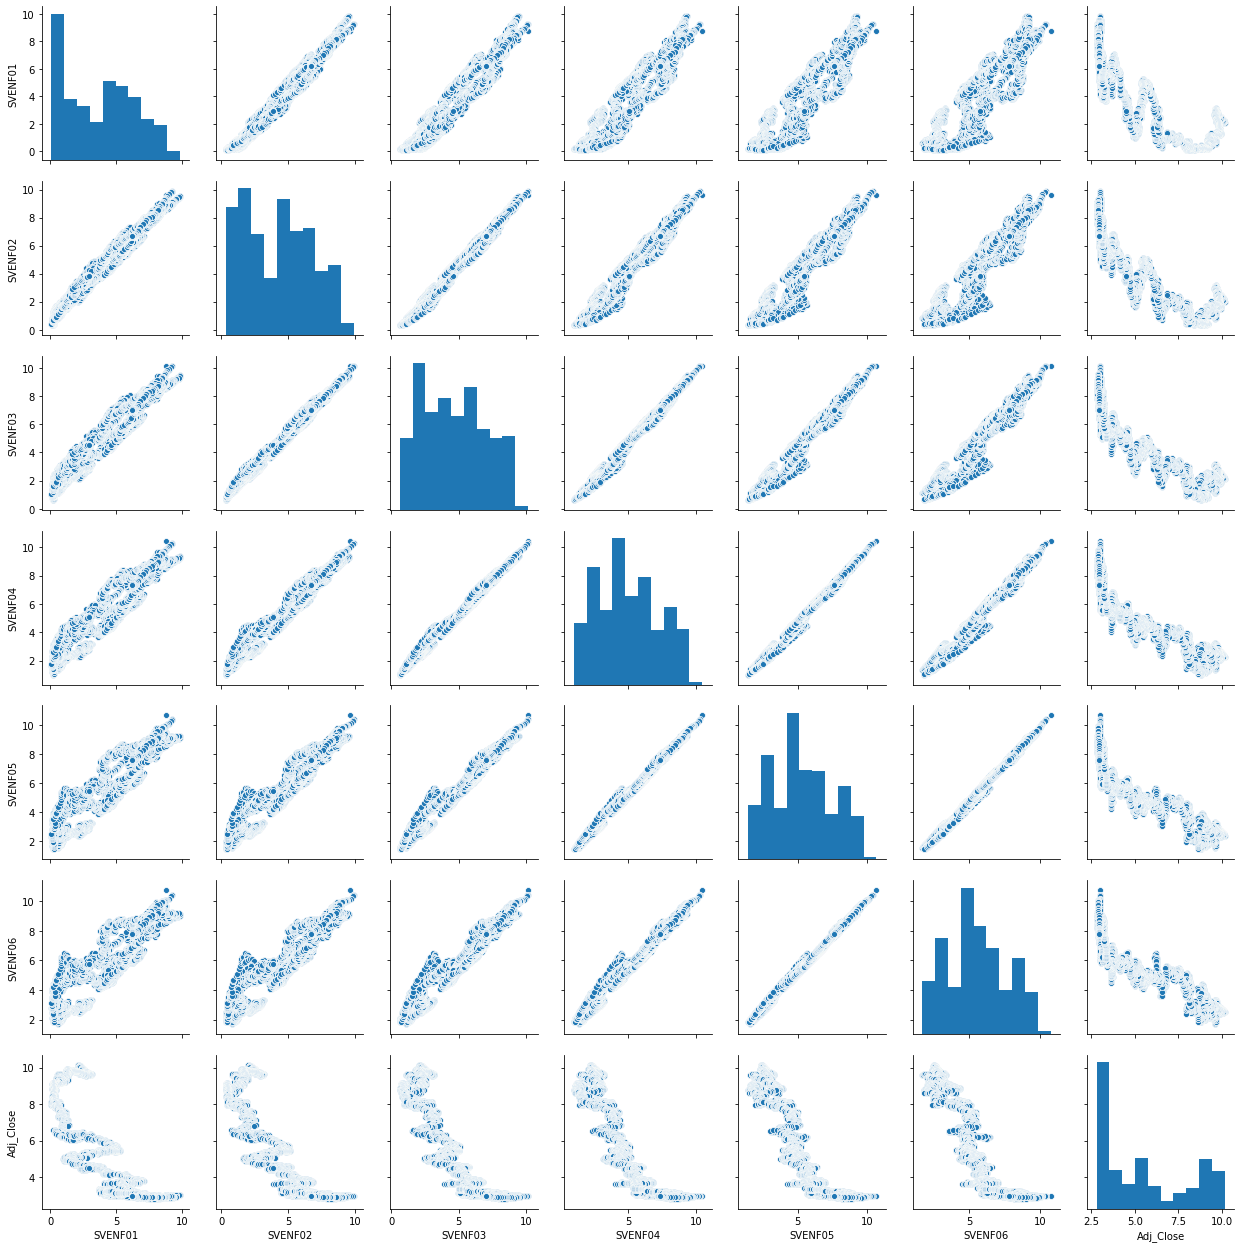

In [31]:
sns.pairplot(data[['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'SVENF06', 'Adj_Close']])

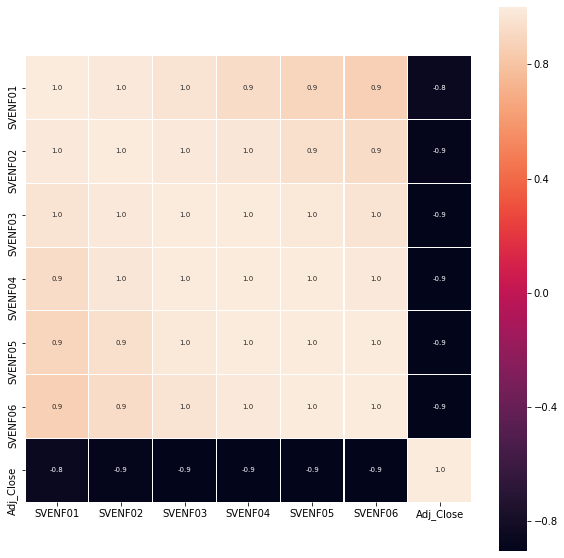

In [32]:
cm = np.corrcoef(data[['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'SVENF06', 'Adj_Close']].values.T)
fig, ax = plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm,
                 linewidths = 0.1,
                 annot=True,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 7},
                 yticklabels=['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'SVENF06', 'Adj_Close'],
                 xticklabels=['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'SVENF06', 'Adj_Close'])

In [112]:
#Borrowed from my previous assignment

X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-1]], data[data.columns[-1]], test_size=0.15, 
                                                    random_state=42)

slr = LinearRegression()
slr.fit(X_train, y_train)

#Code below derived from Raschka Ch. 10

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -4.838
Intercept: 11.807


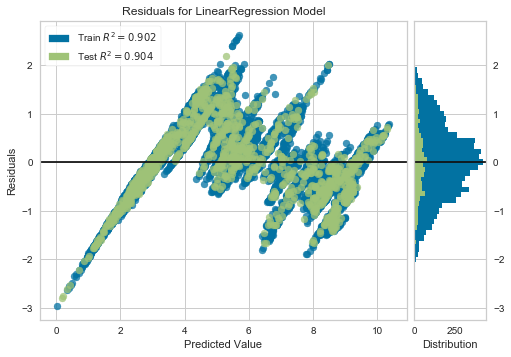

In [113]:
#Assistance provided from https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

# R^2 of the training an testing are shown on the graph

In [116]:
print('Training Data MSE: %.3f' % mean_squared_error(slr.predict(X_train), y_train))
print('Testing Data MSE: %.3f' % mean_squared_error(slr.predict(X_test), y_test))


Train_RMSE = math.sqrt(mean_squared_error(slr.predict(X_train), y_train))
Test_RMSE = math.sqrt(mean_squared_error(slr.predict(X_test), y_test))

print()
print('Training Data RMSE: %.3f' % Train_RMSE)
print('Testing Data RMSE: %.3f' % Test_RMSE)

Training Data MSE: 0.603
Testing Data MSE: 0.612

Training Data RMSE: 0.777
Testing Data RMSE: 0.782


In [110]:
#PART TWO: PCA on Dataset
X = df.iloc[:, :-1].values
y = df['Adj_Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

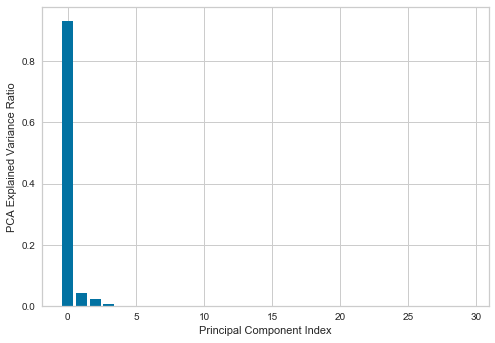

In [219]:
pca = PCA(n_components=None)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X_train)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('Principal Component Index')
plt.ylabel('PCA Explained Variance Ratio')
plt.show()

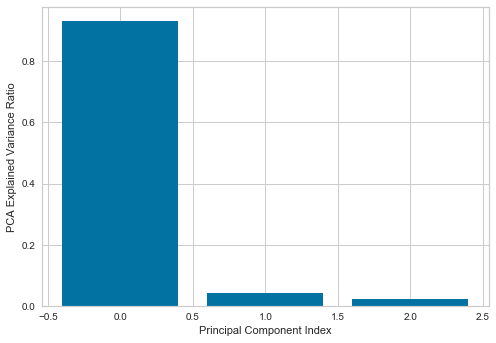

In [218]:
pca2 = PCA(n_components=3)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, pca2)
pipeline.fit(X_train)

features = range(pca2.n_components_)
plt.bar(features, pca2.explained_variance_ratio_)
plt.xlabel('Principal Component Index')
plt.ylabel('PCA Explained Variance Ratio')
plt.show()

In [240]:
#PART THREE: Logistic Regression Classifier (LRC) vs. SVM Classifier
#Calculate R2 Score and RMSE

#Linear Regression: All attributes

lnr = LinearRegression()
lnr.fit(X_train_std,y_train)
y_test_pred = lnr.predict(X_test_std)
y_train_pred = lnr.predict(X_train_std)

print("LNR: All Attributes:")
print("----------------------")

R2_Train_Score_All_LRC = lnr.score(X_train_std, y_train)
print("R2 Train Score: %.3f" % R2_Train_Score_All_LRC)

R2_Test_Score_All_LRC = lnr.score(X_test_std, y_test)
print("R2 Test Score: %.3f" % R2_Test_Score_All_LRC)

RMSE_TrainL = math.sqrt(mean_squared_error(y_train,y_train_pred))
print("RMSE Train: %.3f" % RMSE_TrainL)

RMSE_TestL = math.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE Test: %.3f" % RMSE_TestL)

LNR: All Attributes:
----------------------
R2 Train Score: 0.902
R2 Test Score: 0.904
RMSE Train: 0.777
RMSE Test: 0.782


In [239]:
#SVR: All attributes

svr=SVR()
svr.fit(X_train_std,y_train)
y_test_pred = svr.predict(X_test_std)
y_train_pred = svr.predict(X_train_std)

print("SVR: All Attributes:")
print("----------------------")

R2_Train_Score_All_SVR = svr.score(X_train_std, y_train)
print("R2 Train Score: %.3f" % R2_Train_Score_All_SVR)

R2_Test_Score_All_SVR = svr.score(X_test_std, y_test)
print("R2 Test Score: %.3f" % R2_Test_Score_All_SVR)

RMSE_TrainSVR = math.sqrt(mean_squared_error(y_train,y_train_pred))
print("RMSE Train: %.3f" % RMSE_TrainSVR)

RMSE_TestSVR = math.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE Test: %.3f" % RMSE_TestSVR)

SVR: All Attributes:
----------------------
R2 Train Score: 0.989
R2 Test Score: 0.989
RMSE Train: 0.265
RMSE Test: 0.263


In [238]:
#Linear Regression: Three attributes

X_train3 = scaler.fit_transform(X_train)
X_test3 = scaler.transform(X_test)

X_train_3 = pca2.fit_transform(X_train3)
X_test_3 = pca2.fit_transform(X_test3)

lnr.fit(X_train_3,y_train)
y_test_pred = lnr.predict(X_test_3)
y_train_pred = lnr.predict(X_train_3)

print("LNR: Three Attributes:")
print("----------------------")

R2_Train_Score_3_LNR = lnr.score(X_train_3, y_train)
print("R2 Train Score: %.3f" % R2_Train_Score_3_LNR)

R2_Test_Score_3_LNR = lnr.score(X_test_3, y_test)
print("R2 Test Score: %.3f" % R2_Test_Score_3_LNR)

RMSE_TrainLNR3 = math.sqrt(mean_squared_error(y_train,y_train_pred))
print("RMSE Train: %.3f" % RMSE_TrainLNR3)

RMSE_TestLNR3 = math.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE Test: %.3f" % RMSE_TestLNR3)

LNR: Three Attributes:
----------------------
R2 Train Score: 0.867
R2 Test Score: 0.864
RMSE Train: 0.905
RMSE Test: 0.933


In [237]:
#SVR: Three attributes

svr.fit(X_train_3,y_train)
y_test_pred = svr.predict(X_test_3)
y_train_pred = svr.predict(X_train_3)

print("SVR: Three Attributes:")
print("----------------------")

R2_Train_Score_3_SVR = svr.score(X_train_3, y_train)
print("R2 Train Score: %.3f" % R2_Train_Score_3_SVR)

R2_Test_Score_3_SVR = svr.score(X_test_3, y_test)
print("R2 Test Score: %.3f" % R2_Test_Score_3_SVR)

RMSE_TrainSVR3 = math.sqrt(mean_squared_error(y_train,y_train_pred))
print("RMSE Train: %.3f" % RMSE_TrainSVR3)

RMSE_TestSVR3 = math.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE Test: %.3f" % RMSE_TestSVR3)

C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR: Three Attributes:
----------------------
R2 Train Score: 0.990
R2 Test Score: 0.988
RMSE Train: 0.248
RMSE Test: 0.276


In [195]:
print("My name is Jonathan Zoia")
print("My NetID is: jzoia2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jonathan Zoia
My NetID is: jzoia2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
